In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import time

plt.style.use(['science', 'notebook', 'grid'])

In [2]:
x = torch.tensor([[6, 2],
                  [5, 2], 
                  [1, 3],
                  [7, 6]]).float()

y = torch.tensor([1, 5, 2, 5]).float()

In [3]:
x.shape

torch.Size([4, 2])

In [4]:
y.shape

torch.Size([4])

In [5]:
M1 = nn.Linear(2, 8, bias=False)

for i in M1.parameters():
    print(i)

M1

Parameter containing:
tensor([[-0.0439, -0.5515],
        [ 0.5869,  0.6152],
        [ 0.2653, -0.4976],
        [-0.6396,  0.4220],
        [ 0.3099,  0.0617],
        [-0.2143, -0.3919],
        [ 0.1908,  0.4552],
        [ 0.5848, -0.2599]], requires_grad=True)


Linear(in_features=2, out_features=8, bias=False)

In [6]:
M1(x).shape

torch.Size([4, 8])

In [7]:
M2 = nn.Linear(8, 1, bias=False)

M2

Linear(in_features=8, out_features=1, bias=False)

In [8]:
M2(M1(x))

tensor([[-3.1442],
        [-2.4967],
        [ 0.4636],
        [-2.3103]], grad_fn=<MmBackward0>)

In [9]:
M2(M1(x)).squeeze()

tensor([-3.1442, -2.4967,  0.4636, -2.3103], grad_fn=<SqueezeBackward0>)

In [10]:
y

tensor([1., 5., 2., 5.])

In [11]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        # Note: super()
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8)
        self.Matrix2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

In [12]:
f = MyNeuralNet()

In [13]:
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[ 0.0522,  0.3089],
        [ 0.0246,  0.0121],
        [ 0.1318,  0.6361],
        [-0.2511, -0.3531],
        [ 0.0394, -0.6198],
        [-0.2664, -0.3021],
        [-0.4996,  0.6995],
        [ 0.6762, -0.3064]], requires_grad=True)
Parameter containing:
tensor([ 0.5915,  0.4255,  0.1368,  0.3862, -0.5585, -0.0727,  0.0384,  0.4060],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1313,  0.0158,  0.0863,  0.2169,  0.0443, -0.3144,  0.2273,  0.1242]],
       requires_grad=True)
Parameter containing:
tensor([0.0827], requires_grad=True)


In [14]:
yhat = f(x)

print(torch.mean((y-yhat)**2))

tensor(7.3238, grad_fn=<MeanBackward0>)


[Classical ML Equations in LaTeX](https://blmoistawinde.github.io/ml_equations_latex/)

$$\sum_{i=1}^{D}(x_i-y_i)^2$$

In [15]:
L = nn.MSELoss()
L(y, yhat)

tensor(7.3238, grad_fn=<MseLossBackward0>)

In [16]:
opt = SGD(f.parameters(), lr=0.001)

In [17]:
losses = []
for _ in range(1000):
    opt.zero_grad()
    loss_value = L(f(x), y)
    loss_value.backward()
    opt.step()
    losses.append(loss_value.item())

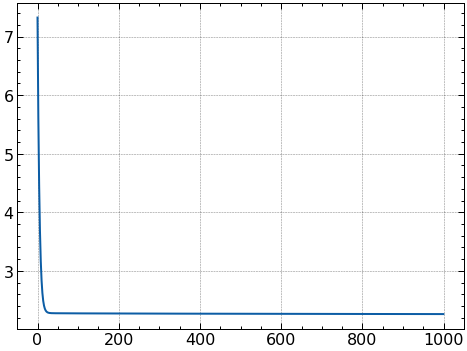

In [18]:
plt.plot(losses)

In [55]:
A1 = torch.tensor([[0.0783, 0.3295], [0.0282, 0.0149], [0.1537, 0.6537],
                   [-0.2202, -0.3302], [0.0416, -0.6190], [-0.3257, -0.3481],
                   [-0.4616, 0.7285], [0.7038, -0.2846]])

b1 = torch.tensor(
    [0.6152, 0.4306, 0.1581, 0.4045, -0.5643, -0.1178, 0.0650, 0.4307])

A2 = torch.tensor([
    [0.2504, 0.0699, 0.2089, 0.1776, -0.0909, -0.4156, 0.2431, 0.2489]])

b2 = torch.tensor([0.1948])

res=torch.mm(A1,x.T).T
res=res+b1


res=res.T
res=torch.mm(A2,res)
res=res+b2
res

tensor([[2.8991, 2.6900, 2.3222, 4.9829]])

In [71]:
f(x)

tensor([2.8991, 2.6900, 2.3223, 4.9831], grad_fn=<SqueezeBackward0>)

In [72]:
y

tensor([1., 5., 2., 5.])